# Term Document Matrix

How do we represent a document as a vector? A collection of such vectors is known as a "Term Document Matrix" (TDM).

In [1]:
from google.colab import drive
drive.mount('/content/drive')  # Add My Drive/<>

import os
os.chdir('drive/My Drive')
os.chdir('Books_Writings/NLPBook/')

Mounted at /content/drive


In [2]:
%%capture
%pylab inline
import pandas as pd
import os
# !pip install ipypublish
# from ipypublish import nb_setup
%load_ext rpy2.ipython
from IPython.display import Image

## Term Document Matrix

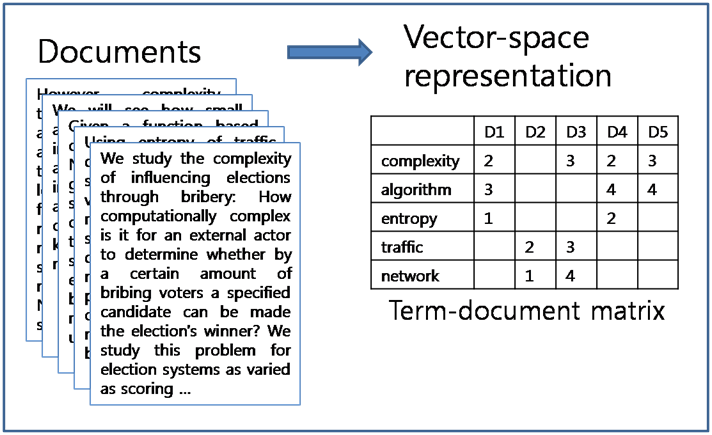

In [ ]:
Image("NLP_images/tdm.png", width=500)

## Term Frequency - Inverse Document Frequency (TF-IDF)

This is a weighting scheme provided to sharpen the importance of rare words in a document, relative to the frequency of these words in the corpus. It is based on simple calculations and even though it does not have strong theoretical foundations, it is still very useful in practice. The TF-IDF is the importance of a word $w$ in a document $d$ in a corpus $C$. Therefore it is a function of all these three, i.e., we write it as $TFIDF(w,d,C)$, and is the product of term frequency (TF) and inverse document frequency (IDF).

The frequency of a word in a document is defined as

$$
f(w,d)=\frac{\#w \in d}{|d|}
$$

where $|d|$ is the number of words in the document. We may normalize word frequency so that

$$
TF(w,d)=ln[f(w,d)]
$$

This is log normalization. Another form of normalization is known as double normalization and is as follows:

$$
TF(w,d)=\frac{1}{2} + \frac{1}{2} \cdot \frac{f(w,d)}{\max_{w \in d} f(w,d)}
$$

Note that normalization is not necessary, but it tends to help shrink the difference between counts of words.

Inverse document frequency is as follows (in this case we show the normalized version):

$$
IDF(w,C)=\ln\left[\frac{|C|}{|d_{w \in d}|}\right]
$$

That is, we compute the ratio of the number of documents in the corpus $C$ divided by the number of documents with word $w$ in the corpus.

Finally, we have the weighting score for a given word $w$ in document $d$ in corpus $C$:

$$
TFIDF(w,d,C)=TF(w,d) \times IDF(w,C)
$$

In [3]:
# Collect some text data
!pip install cssselect
import requests
from lxml.html import fromstring

#Copy the URL from the web site
url = 'https://economictimes.indiatimes.com'
html = requests.get(url, timeout=10).text

#See: http://infohost.nmt.edu/~shipman/soft/pylxml/web/etree-fromstring.html
doc = fromstring(html)

#http://lxml.de/cssselect.html#the-cssselect-method
doc.cssselect(".active")

x = doc.cssselect(".active li")    #Try a, h2, section if you like
headlines = [x[j].text_content() for j in range(len(x))]
headlines = headlines[:20]   #Needed to exclude any other stuff that was not needed.
print(headlines)

['Rising Bharat may need to take center stage for India’s game-changing plans', 'Will Indian Railways accelerate to global standards?', 'Clearer skies for plane lessors with new bill', 'EVs to drive 30% of volumes for TVS', 'Tapping nobility in all professions', 'How Trump changed lives of legal immigrants', "India's ancient tag sport seeks Olympic push", 'Leadership holds key to AI adoption success', "Trump says 'H-1B lets the best people in' ", 'US school shooting: Teen kills female student', "Musk behind Ramaswamy's ouster from DOGE?", 'India to form consortium for global port ops', 'Modi, Trump likely to meet in Feb', 'India sets target to register 10k GI products', 'Domestic air traffic grows to 16.13 cr in 2024', 'Knife attacker in Germany kills two', 'Expect demand moderation to continue: HUL', '6 Trump executive orders to watch', 'Star Air offers 66,666 tickets from Rs 1950', "Indians aren't that worried Trump’s back"]


In the next code block, we see the use of Scikit-Learn's TFIDF vectorizer. We have 20 headlines (documents) and the dimension of the matrix will be 20 times the number of unique words (terms) across all the documents. The dimension is shown in the output below. From the dimensions we see that it is a document-term matrix (DTM) and its transpose will be a TDM.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidf = TfidfVectorizer()
# tfidf = CountVectorizer()
tfs = tfidf.fit_transform(headlines)
tfs

<20x120 sparse matrix of type '<class 'numpy.float64'>'
	with 148 stored elements in Compressed Sparse Row format>

In [8]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
res = [word_tokenize(j) for j in headlines]
res[:2]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[['Rising',
  'Bharat',
  'may',
  'need',
  'to',
  'take',
  'center',
  'stage',
  'for',
  'India',
  '’',
  's',
  'game-changing',
  'plans'],
 ['Will',
  'Indian',
  'Railways',
  'accelerate',
  'to',
  'global',
  'standards',
  '?']]

In [9]:
# Make TDM
tdm_mat = tfs.toarray().T
print(tdm_mat.shape)
tdm_mat

(120, 20)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.4077704 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.36447019, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.42828064]])

## The BM25 Algorithm

- This is a modification of TF-IDF to account for word saturation and document length. See: https://zilliz.com/learn/mastering-bm25-a-deep-dive-into-the-algorithm-and-application-in-milvus

- A HuggingFace implementation: https://huggingface.co/blog/xhluca/bm25s

Both, the TF and IDF parts are modified as follows:

$$
TF(w,d) = \frac{TF(w,d)}{TF(w,d) + k (1-b+b \cdot \frac{|d|}{AVG(|d|)})}
$$

where $k$ modulates word saturation and $b$ modulates document length. The size of document $d$ is denoted as $|d|$.

$$
IDF(w) = \ln\left[\frac{|C|-DF(w)+0.5}{DF(w)+0.5} \right], \quad \mbox{if } DF(w)\geq 0.5
$$

else

$$
IDF(w) = \ln \left[\frac{|C|}{DF(w)} \right], \quad \mbox{if } DF(w) < 0.5
$$

where $N$ is the number of documents and $DF(w)$ is the document frequency for word $w$.

## Implementation of BM25

- Ref: https://gist.github.com/koreyou/f3a8a0470d32aa56b32f198f49a9f2b8
- Another reference: https://pypi.org/project/rank-bm25/
- Notebook: https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/search/semantic-search/sparse/bm25/bm25-vector-generation.ipynb

## WordClouds

We can take the text in the headlines and generate a wordcloud.

In [10]:
!conda install -c conda-forge wordcloud -y

/bin/bash: line 1: conda: command not found


In [11]:
text = ''
for h in headlines:
    text = text + ' ' + h
print(text)

 Rising Bharat may need to take center stage for India’s game-changing plans Will Indian Railways accelerate to global standards? Clearer skies for plane lessors with new bill EVs to drive 30% of volumes for TVS Tapping nobility in all professions How Trump changed lives of legal immigrants India's ancient tag sport seeks Olympic push Leadership holds key to AI adoption success Trump says 'H-1B lets the best people in'  US school shooting: Teen kills female student Musk behind Ramaswamy's ouster from DOGE? India to form consortium for global port ops Modi, Trump likely to meet in Feb India sets target to register 10k GI products Domestic air traffic grows to 16.13 cr in 2024 Knife attacker in Germany kills two Expect demand moderation to continue: HUL 6 Trump executive orders to watch Star Air offers 66,666 tickets from Rs 1950 Indians aren't that worried Trump’s back


(-0.5, 399.5, 199.5, -0.5)

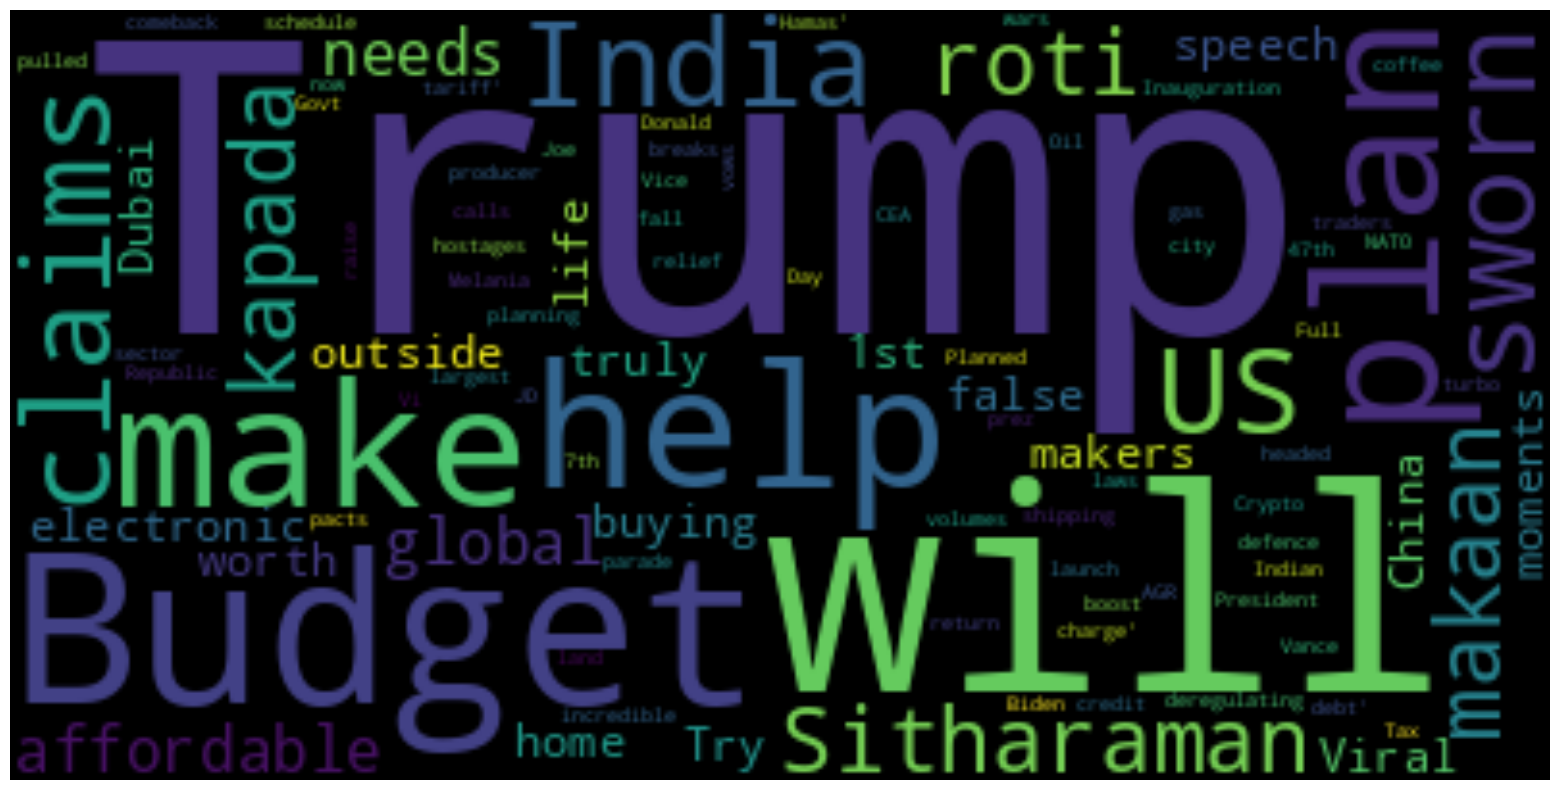

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(text)

#Use pyplot from matplotlib
figure(figsize=(20,10))
pyplot.imshow(wordcloud, interpolation='bilinear')
pyplot.axis("off")